In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/candledata/BTCUSDT, 15.csv")

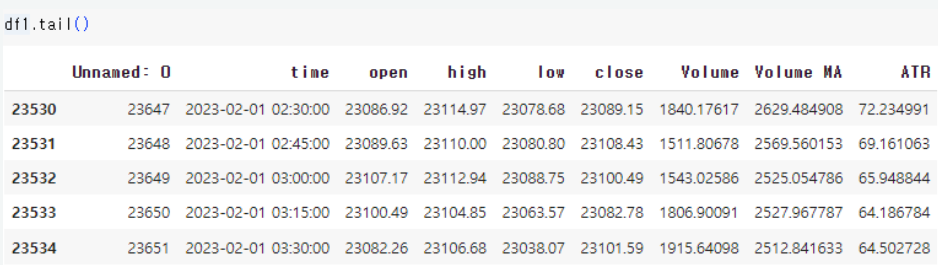

In [ ]:
close = list(df1['close'])
open = list(df1['open'])
length = len(df1)

Bullish = [0]*length

for i in range(len(df1)):
  if close[i]-open[i] > 0:
    Bullish[i] = 1
  else:
    Bullish[i] = 0

df1['Bullish'] = Bullish
dfpl_Bullish = df1[(df1['Bullish']==1)]
dfpl_Bullish['index'] = dfpl_Bullish.index

In [ ]:
dfpl = df1
length_B = len(dfpl_Bullish)
result = [0]*length_B
profit = [0]*length_B
k = 1.5
r=25
for l in range(length_B):
  atr = dfpl.loc[dfpl_Bullish.iloc[l]['index']]['ATR']
  Loss = dfpl.loc[dfpl_Bullish.iloc[l]['index']]['close'] -k*atr
  Gain = dfpl.loc[dfpl_Bullish.iloc[l]['index']]['close'] +k*atr

  for i in range(1,r):
    if dfpl_Bullish.iloc[l]['index']+i >= len(dfpl):
      break
    if (Gain <= dfpl.loc[dfpl_Bullish.iloc[l]['index']+i]['high']) and (Loss >= dfpl.loc[dfpl_Bullish.iloc[l]['index']+i]['low']):
      result[l] = 3
      profit[l] = 0
      break
    elif (Gain <= dfpl.loc[dfpl_Bullish.iloc[l]['index']+i]['high']):
      result[l] = 1
      profit[l] = k*atr/dfpl.loc[dfpl_Bullish.iloc[l]['index']]['close']*100
      break
    elif (Loss >= dfpl.loc[dfpl_Bullish.iloc[l]['index']+i]['low']):
      result[l] = 2
      profit[l] = -k*atr/dfpl.loc[dfpl_Bullish.iloc[l]['index']]['close']*100
      break

dfpl_Bullish['result'] = result
dfpl_Bullish['profit'] = profit

print("k:",k) #몇배의 atr를 곱할 것인지
print("r:",r)#몇번째 캔들까지 볼것인지
print(dfpl_Bullish['result'].value_counts())
print("합계 수익률: ",dfpl_Bullish['profit'].sum())

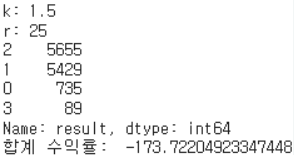